In [79]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
# Additional libraries for text preprocessing and feature engineering
import re
from nltk.corpus import stopwords
import numpy as np

In [99]:
# Load dataset
df = pd.read_csv("../../Fake review detection dataset/Yelp Dataset Reduced.csv")

In [100]:
df.head()

,ID,USER_ID,PRODUCT_ID,RATING,DATE,LABEL,REVIEW_TEXT,AVERAGE_RATING,RATING_DEVIATION,TOTAL_PRODUCT_REVIEWS,...,RATING_CATEGORY,SINGLE_RATING_CATEGORY,REVIEW_COUNT_DATE,SAME_DATE_MULTIPLE_REVIEWS,MAX_USER_REVIEWS_DAY,TIMESTAMP_DIFFERENCE,AVERAGE_USER_REVIEW_LENGTH,TOTAL_USER_REVIEWS,PERCENTAGE_POSITIVE_REVIEWS,RATIO_POSITIVE_NEGATIVE
0,144828,66563,416,4,10-12-2014,-1,Great.....,3.767293,0.232707,2183,...,1,1,1,0,2,0 days,11.500000,2,100.0,6.157377
1,157607,74755,449,4,26-03-2013,1,My family and I had Bubby's brunch on a Saturd...,3.396552,0.603448,812,...,1,1,2,0,2,1723 days,724.666667,12,100.0,3.121827
2,70401,49165,237,3,11-10-2011,1,"I really like this place, but they need to get...",3.799003,0.799003,602,...,1,1,2,0,1,0 days,314.000000,1,100.0,6.082353
3,124810,75653,363,5,14-01-2014,1,This is one of my favorite places in the US. A...,3.990361,1.009639,2075,...,1,1,1,0,1,0 days,280.000000,1,100.0,9.121951
4,42068,32402,100,4,02-12-2014,1,Make sure you go with a small group of friends...,3.951812,0.048188,2677,...,1,1,2,0,1,398 days,255.666667,3,100.0,8.734545


In [93]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove punctuation and special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra whitespace
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])    
    return text

df["REVIEW_TEXT"] = df["REVIEW_TEXT"].apply(preprocess_text)

In [101]:
# Assuming df is your DataFrame containing the 'REVIEW_TEXT' and 'LABEL' columns
# Filter the DataFrame for label equal to -1 and select one row
review_label_minus_1 = df[df['LABEL'] == 1]['REVIEW_TEXT'].iloc[15]

# Print the review text without truncation
print(review_label_minus_1)

Only Australian food I've ever had prior to coming here was trying out the meat pies at the Tuck Shop on E. Houston and steak at Outback, which I know doesn't count. Wasn't too impressed with either. My friend suggested we try The Thirsty Koala in the ethnic food Mecca of Queens: Astoria. Looking at menu, I noticed they didn't serve koala. Good, leave the cute critters alone. Nothing really stood out as something exclusive to Australia, actually. We started off with the lamb lollies (best part of meal). Savory, juicy, and just the right amount of fat left on to optimize the flavor. The lollies came with caramelized pumpkin, leafy greens (can't recall what kind) and pomegranate seeds which all complimented each other quite nicely. This app could actually be enough for an entree order. For the main dish, I decided upon the steak tacos. You get 2. I could only finish 1. Tortilla stuffed with steak, caramelized onion, pico de gallo, shredded cabbage, cilantro, and chipotle sauce. Very Aust

In [64]:
df.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
df['TIMESTAMP_DIFFERENCE'] = df['TIMESTAMP_DIFFERENCE'].str.replace(' days', '')
df['TIMESTAMP_DIFFERENCE'] = df['TIMESTAMP_DIFFERENCE'].astype(int)
num_features = df.drop(['ID','USER_ID','PRODUCT_ID','DATE','REVIEW_TEXT','LABEL'],axis=1)

In [65]:
# Use TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["REVIEW_TEXT"])
y = df["LABEL"]  

In [66]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train.shape:', X_train.shape)

print('X_test.shape', X_test.shape)

X_train.shape: (14955, 44623)
X_test.shape (4985, 44623)


In [67]:
# Oversampling with adasyn
adasyn = ADASYN(random_state=42)   #smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train )

In [68]:
# Logistic Rregression Classifer
model = LogisticRegression(max_iter=1000)  
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [69]:
# from sklearn.impute import SimpleImputer

# # Create preprocessing pipelines for text and numerical features
# text_pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer())  
# ])

# # Call fit_transform for text preprocessing
# text_pipeline.fit_transform(df["REVIEW_TEXT"])  # Add this line
# # ngram_range=(1, 3), max_features=5000

# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical data
#     ('scaler', StandardScaler())
# ])

# # Combine preprocessing for text and numerical features
# preprocessor = ColumnTransformer([
#     ('text', text_pipeline, 'REVIEW_TEXT'),
#     ('num', num_pipeline, num_features.columns.tolist())
# ])

# # Create the full pipeline with SMOTE and SVC
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42)),  # Oversample after preprocessing
#     ('classifier', LogisticRegression(max_iter=1000))
# ])

In [70]:
# # Call fit_transform for text preprocessing
# print(text_pipeline.fit_transform(X_train))  # Add this line
# # ngram_range=(1, 3), max_features=5000

In [71]:
# # Fit the pipeline on the training data
# model.fit(X_resampled, y_resampled)

In [72]:
X_train.shape

(14955, 44623)

In [73]:
# Predict probabilities for test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

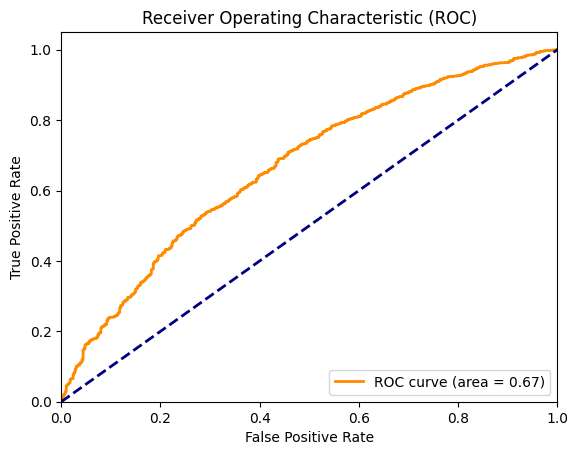

In [74]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [75]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7915747241725175
Confusion Matrix:
 [[ 178  323]
 [ 716 3768]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.20      0.36      0.26       501
           1       0.92      0.84      0.88      4484

    accuracy                           0.79      4985
   macro avg       0.56      0.60      0.57      4985
weighted avg       0.85      0.79      0.82      4985



In [77]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity (true positive rate)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print sensitivity and specificity
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.840321141837645
Specificity (True Negative Rate): 0.35528942115768464
